## Monkey patch sage to view Cluster graphs

Reload the module whenever it changes for easy development:

In [20]:
%reload_ext autoreload
%autoreload 2
from sage_cluster_pictures import *
#from sage_cluster_pictures.cluster_pictures import Cluster
set_verbose(0)
latex.extra_preamble('')
latex.add_to_preamble(r"\usepackage{tkz-graph,semtkzX}")
latex.add_to_mathjax_avoid_list("clusterpicture")
sage.misc.latex.EMBEDDED_MODE = True

Example 1.2 of DMDM

In [21]:
p = 7
x = polygen(Qp(p))
H = HyperellipticCurve((x-1)*(x-(1+p^2))*(x-(1-p^2))*(x-p)*x*(x-p^3)*(x+p^3))
C = Cluster.from_curve(H)
C

Cluster with 7 roots and 2 children

We can display the cluster as ASCII art and unicode art

In [22]:
from sage.misc.latex import _latex_file_, _Latex_prefs, EMBEDDED_MODE, png
def view(objects, title='Sage', debug=False, sep='', tiny=False,
        pdflatex=None, engine=None, viewer=None, tightpage=True, margin=None,
        mode='inline', combine_all=False, **kwds):
    r"""nodetex
    Compute a latex representation of each object in objects, compile,
    and display typeset. If used from the command line, this requires
    that latex be installed.

    INPUT:

    -  ``objects`` -- list (or object)

    -  ``title`` -- string (default: ``'Sage'``): title for the
       document

    -  ``debug`` -- bool (default: ``False``): print verbose
       output

    -  ``sep`` -- string (default: ''): separator between
       math objects

    -  ``tiny`` -- bool (default: ``False``): use tiny font.

    -  ``pdflatex`` -- bool (default: ``False``): use pdflatex. This is
       deprecated. Use ``'engine'`` option instead.

    -  ``engine`` -- string or ``None`` (default: ``None``). Can take the
       following values:

       - ``None`` -- the value defined in the LaTeX global preferences
         ``latex.engine()`` is used.

       - ``'pdflatex'`` -- compilation does tex -> pdf

       - ``'xelatex'`` -- compilation does tex -> pdf

       - ``'latex'`` -- compilation first tries tex -> dvi -> png and if an
         error occurs then tries dvi -> ps -> pdf. This is slower than
         ``'pdflatex'`` and known to be broken when overfull hbox are detected.

    -  ``viewer`` -- string or ``None`` (default: ``None``): specify a viewer
       to use; currently the only options are ``None`` and ``'pdf'``.

    -  ``tightpage`` -- bool (default: ``True``): use the LaTeX package
       'preview' with the 'tightpage' option.

    -  ``margin`` -- float or ``None`` (default: ``None``): adds a margin
       of ``margin`` mm; has no affect if the option ``tightpage`` is
       ``False``.

    - ``mode`` -- string (default: ``'inline'``): ``'display'`` for
      displaymath or ``'inline'`` for inline math

    - ``combine_all`` -- bool (default: ``False``): If ``combine_all`` is
      ``True`` and the input is a tuple, then it does not return a tuple and
      instead returns a string with all the elements separated by a single
      space.

    OUTPUT:

    Display typeset objects.

    This function behaves differently depending on whether in notebook
    mode or not.

    If not in notebook mode, the output is displayed in a separate
    viewer displaying a dvi (or pdf) file, with the following: the
    title string is printed, centered, at the top. Beneath that, each
    object in ``objects`` is typeset on its own line, with the string
    ``sep`` inserted between these lines.

    The value of ``sep`` is inserted between each element of the list
    ``objects``; you can, for example, add vertical space between
    objects with ``sep='\\vspace{15mm}'``, while ``sep='\\hrule'``
    adds a horizontal line between objects, and ``sep='\\newpage'``
    inserts a page break between objects.

    If ``pdflatex`` is ``True``, then the latex engine is set to
    pdflatex.

    If the ``engine`` is either ``pdflatex`` or ``xelatex``,  it produces
    a pdf file. Otherwise, it produces a dvi file, and if the program dvipng is
    installed, it checks the dvi file by trying to convert it to a png
    file.  If this conversion fails, the dvi file probably contains
    some postscript special commands or it has other issues which
    might make displaying it a problem; in this case, the file is
    converted to a pdf file, which is then displayed.

    Setting ``viewer`` to ``'pdf'`` forces the use of a separate
    viewer, even in notebook mode. This also sets the latex engine to be
    ``pdflatex`` if the current engine is latex.

    Setting the option ``tightpage`` to ``True`` (this is the default setting)
    tells LaTeX to use  the package 'preview' with the 'tightpage' option.
    Then, each object is typeset in its own page, and that page is cropped to
    exactly the size of the object. This is typically useful for very
    large pictures (like graphs) generated with tikz. This only works
    when using a separate viewer. Note that the object are currently
    typeset in plain math mode rather than displaymath, because the
    latter imposes a limit on the width of the picture. Technically,
    ``tightpage`` adds ::

        \\usepackage[tightpage,active]{preview}
        \\PreviewEnvironment{page}

    to the LaTeX preamble, and replaces the ``\\[`` and ``\\]`` around
    each object by ``\\begin{page}$`` and ``$\\end{page}``.
    Setting ``tightpage`` to ``False`` turns off this behavior and provides
    the latex output as a full page. If ``tightpage`` is set to ``True``,
    the ``Title`` is ignored.

    If in notebook mode with ``viewer`` equal to ``None``, this
    usually uses MathJax -- see the next paragraph for the exception --
    to display the output in the notebook. Only the first argument,
    ``objects``, is relevant; the others are ignored. If ``objects``
    is a list, each object is printed on its own line.

    In the notebook, this *does* *not* use MathJax if the LaTeX code
    for ``objects`` contains a string in
    :meth:`latex.mathjax_avoid_list() <Latex.mathjax_avoid_list>`.  In
    this case, it creates and displays a png file.

    EXAMPLES::

        sage: sage.misc.latex.EMBEDDED_MODE = True
        sage: view(3)
        <html><script type="math/tex">\newcommand{\Bold}[1]{\mathbf{#1}}3</script></html>
        sage: view(3, mode='display')
        <html><script type="math/tex; mode=display">\newcommand{\Bold}[1]{\mathbf{#1}}3</script></html>
        sage: view((x,2), combine_all=True) # trac 11775
        <html><script type="math/tex">\newcommand{\Bold}[1]{\mathbf{#1}}x 2</script></html>
        sage: sage.misc.latex.EMBEDDED_MODE = False

    TESTS::

        sage: from sage.misc.latex import _run_latex_, _latex_file_
        sage: g = sage.misc.latex.latex_examples.graph()
        sage: latex.add_to_preamble(r"\usepackage{tkz-graph}")
        sage: file = os.path.join(SAGE_TMP, "temp.tex")
        sage: with open(file, 'w') as O:
        ....:     _ = O.write(_latex_file_(g))
        sage: _run_latex_(file, engine="pdflatex") # optional - latex
        'pdf'

        sage: view(4, margin=5, debug=True)     # not tested
        \documentclass{article}
        ...
        \usepackage[tightpage,active]{preview}
        \PreviewEnvironment{page}
        \setlength\PreviewBorder{5.000000mm}
        \begin{document}\begin{page}$4$\end{page}
        \end{document}
        ...

        sage: view(4, debug=True)               # not tested
        \documentclass{article}
        ...
        \usepackage[tightpage,active]{preview}
        \PreviewEnvironment{page}
        \begin{document}\begin{page}$4$\end{page}
        \end{document}
        ...


        sage: latex.extra_preamble('') # reset the preamble

        sage: view(4, engine="garbage")
        Traceback (most recent call last):
        ...
        ValueError: Unsupported LaTeX engine.
        sage: sage.misc.latex.EMBEDDED_MODE = True
        sage: view(4, engine="garbage", viewer="pdf")
        Traceback (most recent call last):
        ...
        ValueError: Unsupported LaTeX engine.

    """

    if tightpage:
        if margin is None:
            margin_str = ""
        else:
            margin_str = '\n\\setlength\\PreviewBorder{%fmm}' % margin
        latex_options = {'extra_preamble':
                         '\\usepackage[tightpage,active]{preview}\n' +
                         '\\PreviewEnvironment{page}%s' % margin_str,
                         'math_left': '\\begin{page}$',
                         'math_right': '$\\end{page}'}
        title = None
    else:
        latex_options = {}

    s = _latex_file_(objects, title=title, sep=sep, tiny=tiny, debug=debug, **latex_options)
    if engine is None:
        engine = _Latex_prefs._option["engine"]
    if pdflatex or (viewer == "pdf" and engine == "latex"):
        engine = "pdflatex"
    # notebook
    if EMBEDDED_MODE and viewer is None:
        MathJax_okay = True
        for t in latex.mathjax_avoid_list():
            if s.find(t) != -1:
                MathJax_okay = False
            if not MathJax_okay:
                break
        if MathJax_okay:  # put comma at end of line below?
            print(MathJax().eval(objects, mode=mode, combine_all=combine_all))
        else:
            base_dir = os.path.abspath("")
            from sage.misc.temporary_file import tmp_filename
            png_file = tmp_filename(ext='.png')
            png_link = "cell://" + png_file
            png(objects, os.path.join(base_dir, png_file),
                debug=debug, engine=engine)
            #print('<html><img src="{}"></html>'.format(png_link))  # put comma at end of line?
            from IPython.core.display import Image
            return Image(filename=png_file)
        return
    # command line or notebook with viewer
    tmp = tmp_dir('sage_viewer')
    tex_file = os.path.join(tmp, "sage.tex")
    with open(tex_file, 'w') as file:
        file.write(s)
    suffix = _run_latex_(tex_file, debug=debug, engine=engine, png=False)
    if suffix == "pdf":
        from sage.misc.viewer import pdf_viewer
        viewer = pdf_viewer()
    elif suffix == "dvi":
        from sage.misc.viewer import dvi_viewer
        viewer = dvi_viewer()
    else:
        print("Latex error")
        return
    output_file = os.path.join(tmp, "sage." + suffix)
    # this should get changed if we switch the stuff in misc.viewer to
    # producing lists
    if not viewer.startswith('sage-native-execute '):
        viewer = 'sage-native-execute ' + viewer
    if debug:
        print('viewer: "{}"'.format(viewer))
    subprocess.call('%s %s' % (viewer, output_file), shell=True,
                    stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    return

In [23]:
sage.misc.latex.view = view

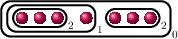

In [24]:
view(C)